In [55]:
import numpy as np
from scipy.optimize import fsolve
from scipy.special import ellipeinc
import matplotlib.pyplot as plt

In [21]:
def amp_constraint(amp, dist, length, n):
    k = 2.*np.pi*n/dist
    Ak2 = (amp*amp*k*k)
    return (np.sqrt(1. + Ak2) * ellipeinc(2.*np.pi*n, Ak2/(1.+Ak2))) - (k*length)



In [61]:
def next_pos_in_sine(x_pos, prev_pos, amp, dist, n_beads, n):
    k = 2.*np.pi*n/dist
    # new_arr = np.array( ( 
    #     1. - ((pos_arr[1] - prev_pos[1])**2) - ((pos_arr[0] - prev_pos[0])**2),
    #     pos_arr[1] - (amp*np.sin(k*pos_arr[0]))
    # ))
    # print(new_arr)
    # return new_arr
    return 1. - ((amp*np.sin(k*x_pos) - prev_pos[1])**2) - ((x_pos[0] - prev_pos[0])**2)

In [62]:
dist = 0.0001
length = 16.
n = 2.
fsolve(amp_constraint, .5, (dist, length, n))

array([2.])

[5.53775785]


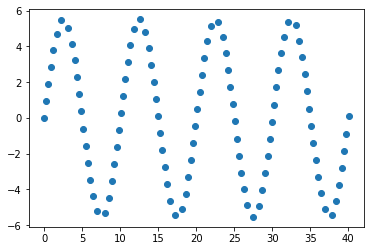

In [74]:
n_beads = 100
dist = 40 
n = 4.

pos_arr = np.zeros((n_beads, 2))


a = fsolve(amp_constraint,.5, (dist, n_beads, n))
print(a)

for i in range(1, n_beads):
    pos_arr[i, 0] = fsolve(next_pos_in_sine, pos_arr[i-1,0]+.5, (pos_arr[i-1], a, dist, n_beads, n))
    pos_arr[i, 1] = a*np.sin(2.*np.pi*n*pos_arr[i,0]/dist)

# print(pos_arr)

plt.scatter(pos_arr[:,0], pos_arr[:,1])
